    ID Stasiun                Waktu  Temperatur  Kode Cuaca  Kecepatan Angin
0      5009222   2023-12-19 0:00:00          75           1               10
1      5009222   2023-12-19 3:00:00          65           1               20
2      5009222   2023-12-19 6:00:00          50           1               10
3      5009222   2023-12-19 9:00:00          70           1               10
4      5009222  2023-12-19 12:00:00          22          50               10
5      5009222  2023-12-19 15:00:00          85           1               10
6      5009222  2023-12-19 18:00:00          90           1               10
7      5009222  2023-12-19 21:00:00          95           1               10
8      5009222   2023-12-20 0:00:00          80           1               10
9      5009222   2023-12-20 3:00:00          65           1               10
10     5009222   2023-12-20 6:00:00          55           1               10
11     5009222   2023-12-20 9:00:00          60           1               10

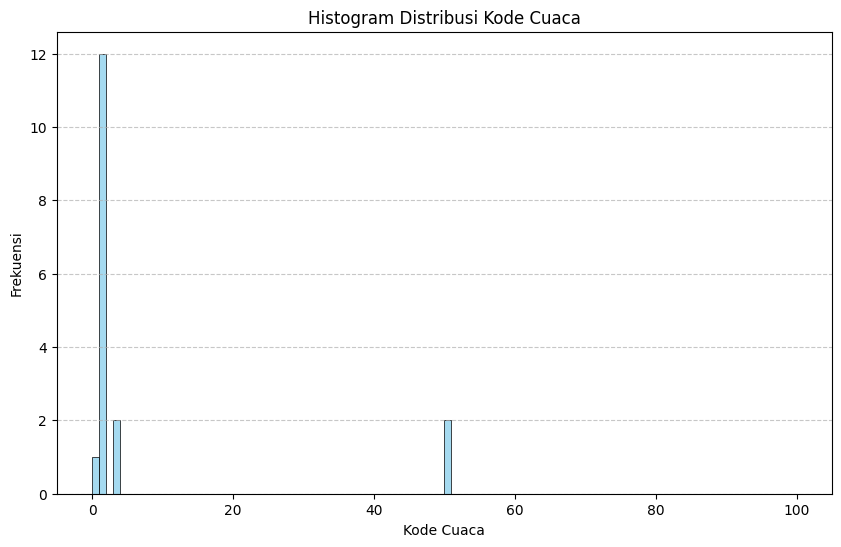

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'ID Stasiun': [5009222,5009222,5009222,5009222,5009222,5009222,5009222,5009222,5009222,5009222,5009222,5009222,5009222,5009222,5009222,5009222,5009222],
    'Waktu': [
        '2023-12-19 0:00:00', '2023-12-19 3:00:00', '2023-12-19 6:00:00', '2023-12-19 9:00:00',
        '2023-12-19 12:00:00', '2023-12-19 15:00:00', '2023-12-19 18:00:00', '2023-12-19 21:00:00',
        '2023-12-20 0:00:00', '2023-12-20 3:00:00', '2023-12-20 6:00:00', '2023-12-20 9:00:00',
        '2023-12-20 12:00:00', '2023-12-20 15:00:00', '2023-12-20 18:00:00', '2023-12-20 21:00:00',
        '2023-12-21 0:00:00'
    ],
    'Temperatur': [75, 65, 50, 70, 22, 85, 90, 95, 80, 65, 55, 60, 23, 85, 90, 95, 85],
    'Kode Cuaca': [1, 1, 1, 1, 50, 1, 1, 1, 1, 1, 1, 1, 50, 1, 3, 3, 0],
    'Kecepatan Angin': [10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 10]
}

df = pd.DataFrame(data)
print(df)

tabel_distribusi_frekuensi = df['Kode Cuaca'].value_counts().sort_index().reset_index()
tabel_distribusi_frekuensi.columns = ['Kode Cuaca', 'Frekuensi']

total_data = len(df)
tabel_distribusi_frekuensi['Probabilitas'] = tabel_distribusi_frekuensi['Frekuensi'] / total_data

print("Tabel Distribusi Frekuensi:")
print(tabel_distribusi_frekuensi)

plt.figure(figsize=(10, 6))
sns.histplot(df['Kode Cuaca'], bins=range(0, 101, 1), kde=False,color='skyblue', edgecolor='black')
plt.title('Histogram Distribusi Kode Cuaca')
plt.xlabel('Kode Cuaca')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()